In [10]:
import numpy as np # Para trabajar con matrices
import matplotlib.pyplot as plt # Para hacer graficas
import requests # Para hacer peticiones HTTP
import pandas as pd # Para trabajar con DataFrames
import seaborn as sns # Para hacer graficas
import warnings
warnings.filterwarnings('ignore')

def get_historic_price(symbol, exchange='bitfinex', after='2022-09-07'): # Funcion para obtener el ClosePrice de una moneda
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(exchange=exchange, symbol=symbol) # Formato de la URL
    resp = requests.get(url, params={ # Hace una peticion HTTP con los parametros de la URL
        'periods': '3600', # Periodo de 1 hora
        'after': str(int(pd.Timestamp(after).timestamp())) # Fecha de inicio
    })
    resp.raise_for_status() # Si la peticion no es exitosa, arroja un error
    data = resp.json() # Convierte la respuesta en un JSON
    df = pd.DataFrame(data['result']['3600'], columns=[ # Convierte el JSON en un DataFrame
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA' # Columnas del DataFrame
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s') # Convierte el campo CloseTime a tipo datetime
    df.set_index('CloseTime', inplace=True) # Setea el index como fecha
    return df # Retorna el DataFrame

In [4]:
last_week = (pd.Timestamp.now() - pd.Timedelta(days=7)).date() # Fecha de hace 7 dias
print(last_week)
btc = get_historic_price('btc', 'bitstamp', after=last_week) # Obtiene el ClosePrice de BTC en Bitstamp hace 7 dias
btc.head() # Imprime los primeros 5 registros del DataFrame

2022-09-07


,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-07 00:00:00,18911,18926,18789,18789,169.791240,3.203456e+06
2022-09-07 01:00:00,18808,18869,18666,18837,110.250569,2.070851e+06
2022-09-07 02:00:00,18836,18859,18789,18790,72.132808,1.358181e+06
2022-09-07 03:00:00,18787,18827,18540,18625,125.376028,2.338276e+06
2022-09-07 04:00:00,18624,18749,18616,18749,31.746378,5.929519e+05


In [5]:
btc.info() # Imprime informacion del DataFrame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 189 entries, 2022-09-07 00:00:00 to 2022-09-14 20:00:00
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OpenPrice   189 non-null    int64  
 1   HighPrice   189 non-null    int64  
 2   LowPrice    189 non-null    int64  
 3   ClosePrice  189 non-null    int64  
 4   Volume      189 non-null    float64
 5   NA          189 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 10.3 KB


In [6]:
btc.isna().sum().sort_values() # Imprime la cantidad de valores nulos por columna

OpenPrice     0
HighPrice     0
LowPrice      0
ClosePrice    0
Volume        0
NA            0
dtype: int64

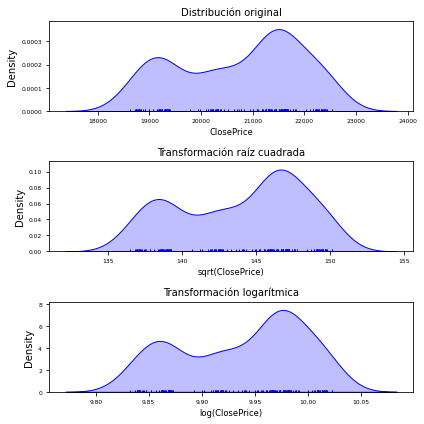

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6)) # Crea una figura con 3 graficas
sns.distplot( # Grafica la distribucion de los btc
    btc.ClosePrice,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('ClosePrice', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot( # Grafica la distribucion de los btc con una transformacion raiz cuadrada
    np.sqrt(btc.ClosePrice),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(ClosePrice)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot( # Grafica la distribucion de los btc con una transformacion logaritmica
    np.log(btc.ClosePrice),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(ClosePrice)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout() # Ajusta el layout de la figura

In [13]:
btc.describe() # Imprime estadisticas descriptivas del DataFrame

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,189.000000,189.000000,189.000000,189.000000,189.000000,1.890000e+02
mean,20721.412698,20822.105820,20630.164021,20726.994709,100.119241,2.076266e+06
std,1189.964866,1204.035789,1176.521663,1184.460495,101.258328,2.125206e+06
min,18624.000000,18749.000000,18540.000000,18625.000000,5.443533,1.172711e+05
25%,19353.000000,19421.000000,19303.000000,19368.000000,35.938649,7.212491e+05
50%,21176.000000,21262.000000,21059.000000,21177.000000,66.447525,1.358181e+06
75%,21618.000000,21698.000000,21550.000000,21619.000000,129.045201,2.703843e+06
max,22545.000000,22781.000000,22485.000000,22540.000000,771.196956,1.697458e+07


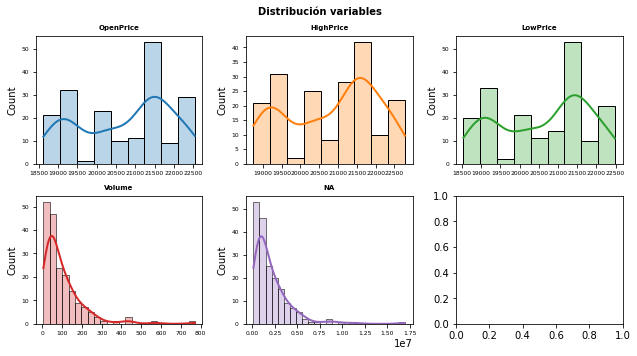

In [26]:
# Gráfico de distribución para cada variable numérica
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5)) #
axes = axes.flat # Aplanar el array de subplots
columnas_numeric = btc.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('ClosePrice')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = btc,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6) 
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables', fontsize = 10, fontweight = "bold");

In [34]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = btc.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
34,NA,Volume,0.997517,0.997517
29,Volume,NA,0.997517,0.997517
20,ClosePrice,LowPrice,0.997235,0.997235
15,LowPrice,ClosePrice,0.997235,0.997235
6,HighPrice,OpenPrice,0.996112,0.996112
1,OpenPrice,HighPrice,0.996112,0.996112
2,OpenPrice,LowPrice,0.995121,0.995121
12,LowPrice,OpenPrice,0.995121,0.995121
9,HighPrice,ClosePrice,0.994942,0.994942
19,ClosePrice,HighPrice,0.994942,0.994942


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        btc.drop('ClosePrice', axis = 'columns'),
                                        btc['ClosePrice'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
print(y_train.describe())
print(y_test.describe())

count      151.000000
mean     20719.205298
std       1190.599128
min      18625.000000
25%      19359.500000
50%      21177.000000
75%      21620.000000
max      22540.000000
Name: ClosePrice, dtype: float64
count       38.000000
mean     20757.947368
std       1174.957870
min      18722.000000
25%      19600.000000
50%      21171.000000
75%      21611.500000
max      22361.000000
Name: ClosePrice, dtype: float64


In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las 
# columnas cualitativas. Para mantener las columnas a las que no se les aplica 
# ninguna transformación se tiene que indicar remainder='passthrough'.
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()

preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols)],
                remainder='passthrough')

In [32]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [33]:
labels = np.concatenate([numeric_cols])
btc_train_prep = preprocessor.transform(X_train)
btc_train_prep = pd.DataFrame(btc_train_prep, columns=labels)
btc_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OpenPrice  151 non-null    float64
 1   HighPrice  151 non-null    float64
 2   LowPrice   151 non-null    float64
 3   Volume     151 non-null    float64
 4   NA         151 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [36]:
from sklearn import set_config
set_config(display='diagram')

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('scale', StandardScaler(),
                                 ['OpenPrice', 'HighPrice', 'LowPrice',
                                  'Volume', 'NA'])])

In [38]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

# Preprocedado

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )


preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                    ],
                    remainder='passthrough'
                )

# Pipeline

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

# Train
# Se asigna el resultado a _ para que no se imprima por pantalla
_ = pipe.fit(X=X_train, y=y_train)

In [42]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = cv,
                return_train_score = True
            )

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.004998,0.004002,0.995541,0.994707,-83.684978,-83.744480
1,0.006997,0.005000,0.984305,0.996490,-136.658914,-72.799333
2,0.007000,0.003000,0.996976,0.994371,-65.958413,-88.238571
3,0.006003,0.003000,0.994677,0.994963,-82.308078,-85.673919
4,0.005998,0.006001,0.992609,0.995425,-102.106587,-80.222575
5,0.006999,0.018003,0.989157,0.995556,-127.226594,-77.400361
6,0.013001,0.011001,0.985420,0.995899,-140.285849,-76.785348
7,0.013001,0.012001,0.987118,0.996130,-139.926526,-72.110566
8,0.021002,0.010001,0.996841,0.994746,-64.949220,-86.933789
9,0.012000,0.005001,0.995889,0.994411,-78.632699,-86.698570


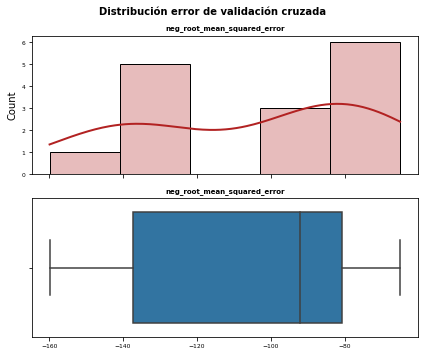

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), sharex=True)

sns.histplot(
    data    = cv_scores['test_neg_root_mean_squared_error'],
    stat    = "count",
    kde     = True,
    line_kws= {'linewidth': 2},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[0]
)

axes[0].set_title('neg_root_mean_squared_error', fontsize = 7, fontweight = "bold")
axes[0].tick_params(labelsize = 6)
axes[0].set_xlabel("")
    
sns.boxplot(
    cv_scores['test_neg_root_mean_squared_error'],
    ax      = axes[1]
)
axes[1].set_title('neg_root_mean_squared_error', fontsize = 7, fontweight = "bold")
axes[1].tick_params(labelsize = 6)
axes[1].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución error de validación cruzada', fontsize = 10,
             fontweight = "bold");

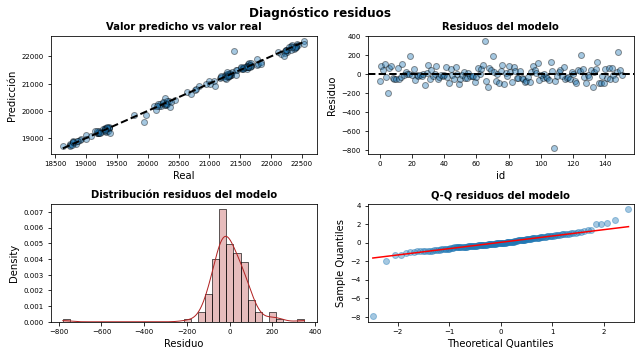

In [47]:
# Diagnóstico errores (residuos) de las predicciones de validación cruzada
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
import statsmodels.api as sm

# Validación cruzada
cv = KFold(n_splits=5, random_state=123, shuffle=True)
cv_prediccones = cross_val_predict(
                    estimator = pipe,
                    X         = X_train,
                    y         = y_train,
                    cv        = cv
                  )

# Gráficos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))

axes[0, 0].scatter(y_train, cv_prediccones, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), y_train - cv_prediccones,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = y_train - cv_prediccones,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    y_train - cv_prediccones,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [49]:
predicciones = pipe.predict(X_test)
df_predicciones = pd.DataFrame({'ClosePrice' : y_test, 'Prediccion' : predicciones})
df_predicciones.head()

,ClosePrice,Prediccion
CloseTime,,
2022-09-09 17:00:00,21306,21255.986256
2022-09-12 22:00:00,22344,22343.989354
2022-09-08 16:00:00,19251,19306.776980
2022-09-08 07:00:00,19238,19308.452402
2022-09-10 22:00:00,21589,21597.487971


In [50]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
rmse

53.34887860755969